In [3]:
using PyPlot,JLD2,MCMCDiagnostics
rc("font",family="serif")
include("CGS.jl")
include("MCMC.jl")

MCMC (generic function with 1 method)

### Plot of simulated years observed vs TTVs

In [5]:
include("decompose_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

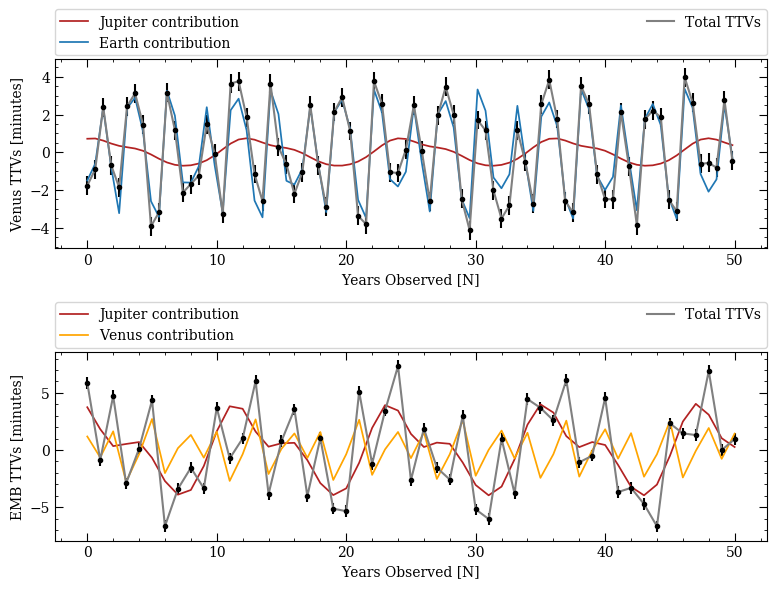

In [6]:
@load ("OUTPUTS/moon_fitmtry3params.jld2")
@load ("mcmc_mtry3results.jld2") 
plot_ttvs(false)
# savefig("ttvs.png")

In [ ]:
plot_ttvs(true)
# savefig("embttvs.png")

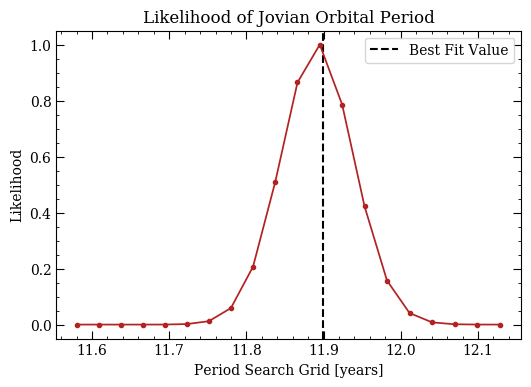

In [221]:
fig, ax1 = subplots(figsize=(6,4))
ax1.minorticks_on()
ax1.tick_params(which="major",direction="in",top="true",right="true",length=6)
ax1.tick_params(which="minor",direction="in",top="true",right="true",length=2)
axvline(param[12]/365.25,linestyle="--",color="black",label="Best Fit Value")
plot(p3/365.25,exp.((lprob_p3 .-maximum(lprob_p3))),linewidth=1.25,marker=".",color="firebrick") 
# plot!( -5:8,(-5:8).^2,inset = (1,bbox(0.1,0.0,0.4,0.4)),subplot = 2)
title("Likelihood of Jovian Orbital Period")
xlabel("Period Search Grid [years]")
ylabel("Likelihood")
legend()
savefig("IMAGES/p3likelihood.png")

In [283]:
jd1 = 2.4332825e6
jd2 = 2.4515445e6
jdsize = 1000
offset = (jd1 + jd2)/2 
p3 = 10 .^ range(log10(500),stop=log10(5000),length=100)
phase = 0
deltaphi = range(dpin,stop=dpout,length=ndp)
for j=1:np3
    phase = p3[j]*range(0,stop=1,length=50) .+ offset
end

println(phase)

2.4424135e6:15.87424636663747:2.443191338071965e6


In [284]:
println(np3," ",p3in," ",p3out," ",nphase)
println(p3)
println(phase)

20 4230.0 4430.0 10
[499.99999999999994, 511.7655109495128, 523.8078763948325, 536.1336110051615, 548.7493827465278, 561.6620164890138, 574.8784976988677, 588.4059762174988, 602.2517701293912, 616.4233697210328, 630.9284415330104, 645.7748325074419, 660.9705742330143, 676.5238872899037, 692.4431856969364, 708.7370814634023, 725.41438924797, 742.4841311272324, 759.9555414764665, 777.838071965236, 796.141396670546, 814.8754173103216, 834.0502686000294, 853.6763237353451, 873.7642000038413, 894.3247645287174, 915.3691401476838, 936.9087114301923, 958.9551308362443, 981.520325020135, 1004.6165012825238, 1028.2561541743255, 1052.4520722560096, 1077.217345015942, 1102.5653699515226, 1128.5098598169595, 1155.06485004158, 1182.2447063227035, 1210.0641323971904, 1238.5381779958554, 1267.6822469850556, 1297.512105699867, 1328.0438914733431, 1359.2941213664699, 1391.2797011035627, 1424.0179342179008, 1457.5265314125877, 1491.82362014167, 1526.9277544167076, 1562.8579248441174, 1599.633568898692, 

In [290]:
dt = (jd2 - jd1)/jdsize
t0 = range(jd1,stop=jd2-1,length = jdsize)
nyears = (jd2-jd1)/365.25 

49.998631074606436

In [286]:
collect(phase)

50-element Array{Float64,1}:
 2.4424135e6         
 2.442429374246367e6 
 2.442445248492733e6 
 2.4424611227391e6   
 2.4424769969854667e6
 2.442492871231833e6 
 2.4425087454782e6   
 2.4425246197245666e6
 2.442540493970933e6 
 2.4425563682172997e6
 2.4425722424636665e6
 2.442588116710033e6 
 2.4426039909563996e6
 ⋮                   
 2.4430167213619323e6
 2.4430325956082987e6
 2.4430484698546655e6
 2.4430643441010322e6
 2.4430802183473986e6
 2.4430960925937654e6
 2.443111966840132e6 
 2.4431278410864985e6
 2.4431437153328652e6
 2.443159589579232e6 
 2.443175463825599e6 
 2.443191338071965e6 

In [ ]:
@load ("mcmc_mtry3results.jld2")
@load ("OUTPUTS/moon_fitmtry3params.jld2")
tmax = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2))
mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
n1,n2,n3 = ntrans
ttsim2 = (ttmodel[n1+1:n1+n2].-t02)./365.25 


In [82]:
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
            "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
            "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
            "tmax sin(phi0)","tmax cos(phi0)","deltaphi"]

18-element Array{String,1}:
 "mu_1"          
 "P_1"           
 "t01"           
 "e1 cos(om1)"   
 "e1 sin(om1)"   
 "mu_2"          
 "P_2"           
 "t02"           
 "e2 cos(om2)"   
 "e2 sin(om2)"   
 "mu_3"          
 "P_3"           
 "t03"           
 "e3 cos(om3)"   
 "e3 sin(om3)"   
 "tmax sin(phi0)"
 "tmax cos(phi0)"
 "deltaphi"      

In [249]:
function vectorize_data(include_moon::Bool=false)
    names = ["mu", "P", "t0", "e cos(om)", "e sin(om)"]
    planet = ["venus", "earth", "jupiter"]
    nparam = length(names)*length(planet)+1
#     state_total = zeros((nsteps-iburn)*nwalkers+50,nparam-1)
    for iparam=1:nparam-1
#     state_total[:,iparam] += vec(par_mcmc[:,iburn:nsteps,iparam])
    if iparam < nparam
        pname = string(planet[div(iparam-1,5)+1]," ",names[mod(iparam-1,5)+1])
    end
        println("index: ",iparam, " ",pname," : ",pbest_global[iparam])
    end
#     for iparam=1:3
#     if iparam < nparam
end
# mu1,P1,t01,ecos1,esin1 = pbest_global[1:5]
# mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
# mu3,P3,t03,ecos3,esin3 = pbest_global[11:15]
# scatter(vec(par_mcmc[1:nwalkers,1:nsteps,1]),vec(par_mcmc[1:nwalkers,1:nsteps,5]))

vectorize_data (generic function with 2 methods)

In [250]:
vectorize_data(false)

index: 1 venus mu : 2.4400941294022936e-6
index: 2 venus P : 224.70077362581506
index: 3 venus t0 : 2.433503768774977e6
index: 4 venus e cos(om) : -0.007328894195584011
index: 5 venus e sin(om) : 0.0020534775024117742
index: 6 earth mu : 2.9954561266272332e-6
index: 7 earth P : 365.2564507566987
index: 8 earth t0 : 2.433624407591685e6
index: 9 earth e cos(om) : 0.007444837391202356
index: 10 earth e sin(om) : 0.00468779249816318
index: 11 jupiter mu : 0.0012445740058471665
index: 12 jupiter P : 4346.048466293495
index: 13 jupiter t0 : 2.4433983646784374e6
index: 14 jupiter e cos(om) : 0.0324036100900935
index: 15 jupiter e sin(om) : -0.02593064969074354


## MCMC Diagnostics

In [3]:
@load("mcmc_mtry1results.jld2")

8-element Array{Symbol,1}:
 :par_mcmc    
 :lprob_mcmc  
 :param       
 :nwalkers    
 :nsteps      
 :accept      
 :iburn       
 :indepsamples

In [11]:
nparam = 18  
samplesize = zeros(nparam)
for j=1:nwalkers
for i=1:nparam
  samplesize[i] += effective_sample_size(par_mcmc[j,:,i])
end
end
indepsamples = minimum(samplesize)
#   println("Independent Sample Size: ",indepsamples)


1600.6485560900187

In [436]:
@load ("mcmc_mtry3results.jld2")
@load ("OUTPUTS/moon_fitmtry3params.jld2")

17-element Array{Symbol,1}:
 :pbest_dp    
 :lprob_dp    
 :lprob_best  
 :pbest_global
 :ntrans      
 :nplanet     
 :tt0         
 :tt          
 :ttmodel     
 :sigtt       
 :p3in        
 :p3out       
 :np3         
 :nphase      
 :dpin        
 :dpout       
 :ndp         

In [437]:
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f
end
#unsure if this works within for loops
#might have used in 200000 step moon run on desktop

extract_data (generic function with 1 method)

In [7]:
extract_data("mcmc_testingresults.jld2")

UndefVarError: UndefVarError: extract_data not defined

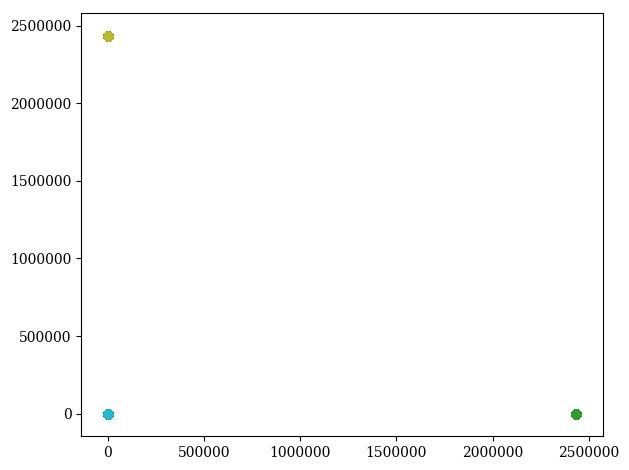

In [8]:
# figsize=(9,5)
figsize=(8,6)
for i=2:5
# subplot(5,1,i)
for j=1:i-1 
#  for i=2:nparam
# #   for j=1:i-1
scatter(vec(par_mcmc[1:nwalkers,iburn:nsteps,i]),vec(par_mcmc[1:nwalkers,iburn:nsteps,j]))
# ylabel(pname[i])
end
end
tight_layout()


## Posterior Distributions

### Plot masses of Venus and Earth in $M_{\oplus}$

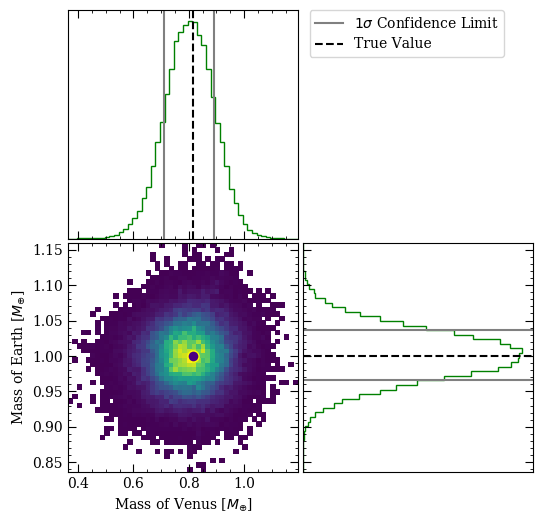

PyObject Text(26.700000000000003, 0.5, 'Mass of Earth [$M_{\\oplus}$]')

In [428]:
nbins = 50
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
optx = param[1].* CGS.MSUN/CGS.MEARTH
opty = param[6].* CGS.MSUN/CGS.MEARTH
truex = 0.815
truey = 1
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Mass of Venus [$M_{\oplus}$]")
ylabel(L"Mass of Earth [$M_{\oplus}$]")
# savefig("massposteriors.png")

### Plot TTV of Earth due to Moon $t_{max}$ vs phase change of Moon per Earth year $\Delta \phi$

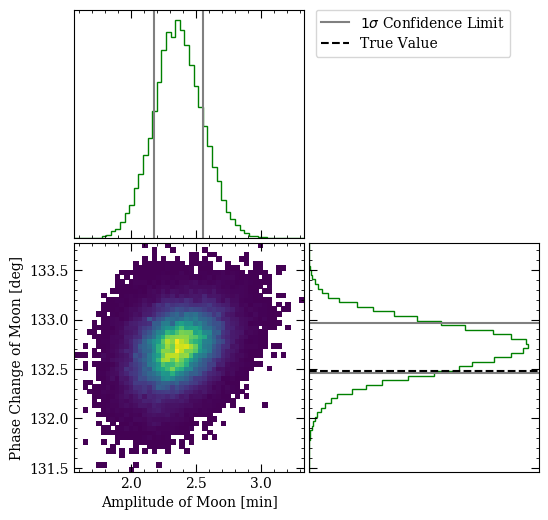

PyObject Text(24.000000000000014, 0.5, 'Phase Change of Moon [deg]')

In [432]:
# function plot_posterior(samples,bins,range)
tmax = vec(par_mcmc[:,iburn:nsteps,16]).^2 + vec(par_mcmc[:,iburn:nsteps,17]).^2
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2)).* (24 * 60)
yvalue = vec(par_mcmc[:,iburn:nsteps,18]).* 57.2957795 
optx = sqrt(param[16]^2 + param[17]^2).* (24 * 60)
opty = param[18].* 57.2957795 
# truex = 
truey = 2.3122 .* 57.2957795 
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Amplitude of Moon [min]")
ylabel("Phase Change of Moon [deg]")
# savefig("moonposteriors.png")

### Plot eccentricities of Venus and Earth

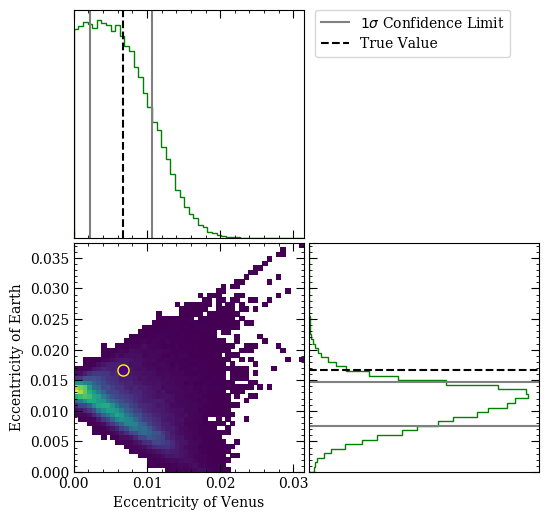

PyObject Text(0.5, 24.0, 'Eccentricity of Venus')

In [433]:
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,4]).^2 + vec(par_mcmc[:,iburn:nsteps,5]).^2)
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,9]).^2 + vec(par_mcmc[:,iburn:nsteps,10]).^2)
optx = sqrt(param[4]^2 + param[5]^2)
opty = sqrt(param[9]^2 + param[10]^2)
truex = 0.006772
truey = 0.0167086
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
ylabel("Eccentricity of Earth")
xlabel("Eccentricity of Venus")
# savefig("eccposteriors.png")

### Plot mass of Jupiter $M_{Jup}$ vs its eccentricity

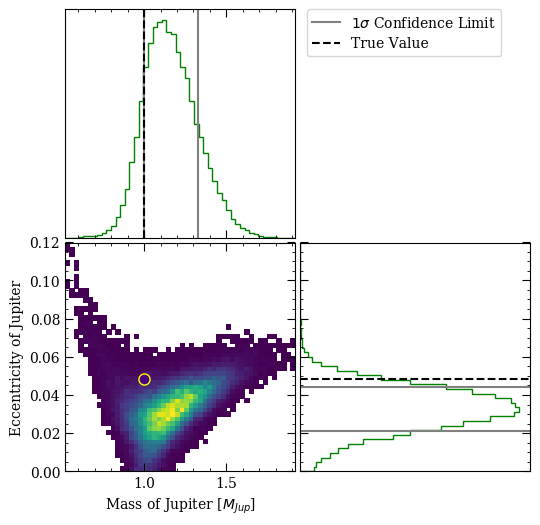

PyObject Text(0.5, 29.299999999999997, 'Mass of Jupiter [$M_{Jup}$]')

In [426]:
xvalue = vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MJUPITER
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,14]).^2 + vec(par_mcmc[:,iburn:nsteps,15]).^2)
optx = param[11].* CGS.MSUN/CGS.MJUPITER
opty = sqrt(param[14]^2 + param[15]^2)
truex = 1
truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
ylabel("Eccentricity of Jupiter")
xlabel(L"Mass of Jupiter [$M_{Jup}$]")
# savefig("jupiterposteriors.png")

### Plot time of inferior conjuction [JD - 24550000] $t_{03}$ vs Jupiter period $P_3$. How does $t_{03}$ compare to phases used in search grid?